# Covid Infections and Vaccination Data

#### Covid Infections and Vaccination Data of India, Germany and Spain over Time 


In [1]:
import pandas as pd
import numpy as np

import subprocess
import os
from datetime import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 800)

sns.set(style="darkgrid")

### Updating the covid infection data using git pull

In [3]:
git_pull = subprocess.Popen( "git pull https://github.com/CSSEGISandData/COVID-19.git" , 
                     cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()


print("Error : " + str(error)) 
print("out : " + str(out))

Error : b'From https://github.com/CSSEGISandData/COVID-19\n * branch                  HEAD       -> FETCH_HEAD\n'
out : b'Already up to date.\n'


In [4]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# Path of John Hopkins covid data downloaded from github and updated using git pull

In [5]:
pd_raw=pd.read_csv(data_path) #To Read CSV Data for covid cases

In [6]:
pd_raw.head() #To display the firt n rows CSV data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181236,181465,181534,181574,181666,181725,181808,181912,181987,182033
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,276821,277141,277141,277409,277444,277663,277940,278211,278504
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265952,265964,265968,265971,265975,265985,265993,266006,266015,266025
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43449,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


### Representing the data in a better format

In [7]:
time_idx = pd_raw.columns[4:] # To get all columns with dates

In [8]:
df_plot = pd.DataFrame({'date':time_idx}) # To create a new data set with a column named date containing all the dates from the previous data
# df_plot.head()

In [9]:
pd_raw['Country/Region'].unique() 

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [10]:
country_list=['India','Germany','Spain',] 

In [11]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [12]:
df_plot[-5:] # To Display cases in last 5 days

,date,India,Germany,Spain
880,6/20/22,43319396,27334993,12563399
881,6/21/22,43331645,27454225,12613634
882,6/22/22,43344958,27573585,12613634
883,6/23/22,43362294,27681775,12613634
884,6/24/22,43378234,27771111,12681820


In [13]:
# Population data for determining COVID cases per population
india_pop = 1352617328
germany_pop = 82927922
spain_pop = 46723749

In [14]:
cases_per_pop = df_plot.copy()


In [15]:
cases_per_pop["India"] = df_plot["India"].div(india_pop)
cases_per_pop["Germany"] = df_plot["Germany"].div(germany_pop)
cases_per_pop["Spain"] = df_plot["Spain"].div(spain_pop)

In [16]:
cases_per_pop[-5:]


,date,India,Germany,Spain
880,6/20/22,0.032026,0.329624,0.268887
881,6/21/22,0.032035,0.331061,0.269962
882,6/22/22,0.032045,0.332501,0.269962
883,6/23/22,0.032058,0.333805,0.269962
884,6/24/22,0.032070,0.334883,0.271421


In [17]:
# Changing date to a standard format

In [18]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [19]:
df_plot['date']=time_idx
# type(df_plot['date'][0])

In [20]:
time_idx1=[datetime.strptime( each,"%m/%d/%y") for each in cases_per_pop.date] # convert to datetime
time_str1=[each.strftime('%Y-%m-%d') for each in time_idx1] # convert back to date ISO norm (str)

In [21]:
cases_per_pop['date']=time_idx1
# type(cases_per_pop['date'][0])

In [22]:
# df_plot.head() 

In [23]:
# cases_per_pop

In [24]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

In [25]:
cases_per_pop.to_csv('../data/processed/COVID_per_pop_table.csv',sep=';',index=False)

# Plot of COVID cases over Time

In [26]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.sort_values('date',ascending=False).head()

,date,India,Germany,Spain
884,2022-06-24,43378234,27771111,12681820
883,2022-06-23,43362294,27681775,12613634
882,2022-06-22,43344958,27573585,12613634
881,2022-06-21,43331645,27454225,12613634
880,2022-06-20,43319396,27334993,12563399


### Covid Cases over time 

<Figure size 1152x648 with 0 Axes>

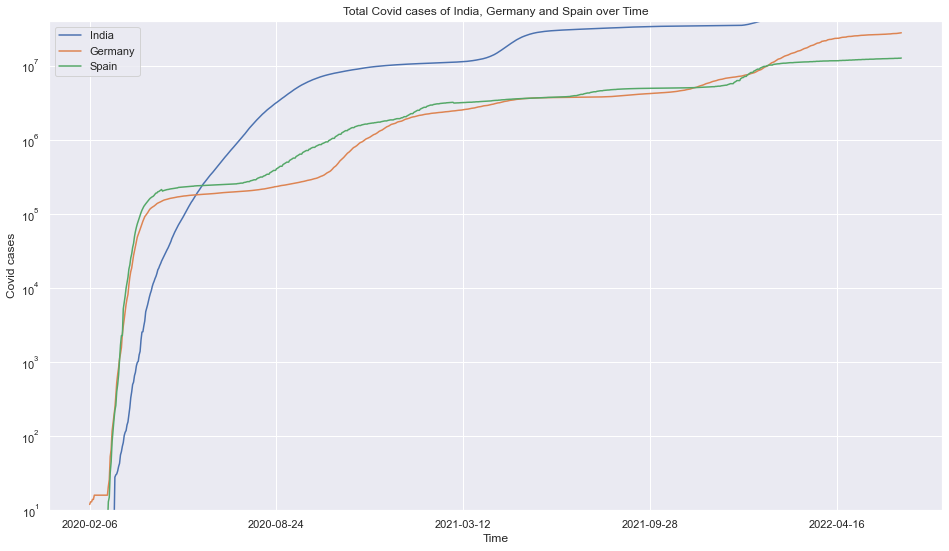

In [27]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 40000000)
plt.ylabel('Covid cases')
plt.xlabel('Time')
plt.title("Total Covid cases of India, Germany and Spain over Time")
ax.set_yscale('log')

### Covid Cases per Population over Time 

In [28]:
cases_per_pop=pd.read_csv('../data/processed/COVID_per_pop_table.csv',sep=';')
cases_per_pop.sort_values('date',ascending=False).head()

,date,India,Germany,Spain
884,2022-06-24,0.032070,0.334883,0.271421
883,2022-06-23,0.032058,0.333805,0.269962
882,2022-06-22,0.032045,0.332501,0.269962
881,2022-06-21,0.032035,0.331061,0.269962
880,2022-06-20,0.032026,0.329624,0.268887


Text(0.5, 1.0, 'Total Covid cases per population of India, Germany and Spain over Time')

<Figure size 1152x648 with 0 Axes>

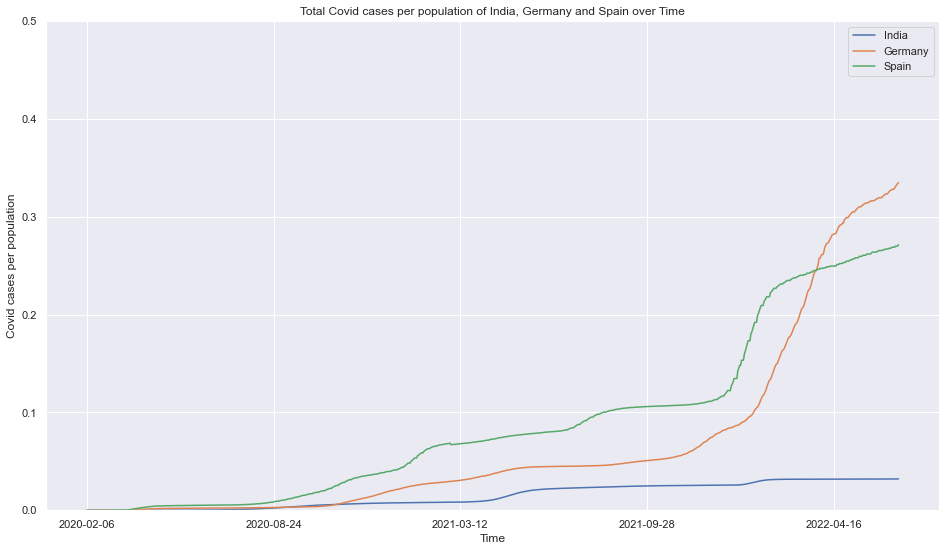

In [29]:
plt.figure();
ax=cases_per_pop.iloc[15:,:].set_index('date').plot()
plt.ylim(0, 0.5)
# plt.xlim(0,100)
plt.ylabel('Covid cases per population')
plt.xlabel('Time')
plt.title("Total Covid cases per population of India, Germany and Spain over Time")
#ax.set_yscale('log')

# Vaccination Data representation over time 

In [30]:
# data_path_vaccination = "https://github.com/govex/COVID-19/tree/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv"

data_path_vaccination = "https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv"


In [31]:
vac=pd.read_csv(data_path_vaccination)

In [32]:
vac

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.000000e+00,0.000000e+00,0.000000e+00,2020-12-14,124.0,NaN
1,World,2020-12-14,5.000000e+00,0.000000e+00,0.000000e+00,2020-12-14,NaN,NaN
2,Canada,2020-12-15,7.230000e+02,0.000000e+00,0.000000e+00,2020-12-15,124.0,NaN
3,China,2020-12-15,1.500000e+06,0.000000e+00,0.000000e+00,2020-12-15,156.0,NaN
4,Russia,2020-12-15,2.850000e+04,2.850000e+04,0.000000e+00,2020-12-15,643.0,NaN
...,...,...,...,...,...,...,...,...
259917,West Bank and Gaza,2022-06-24,3.732571e+06,NaN,NaN,2022-06-25,275.0,NaN
259918,World,2022-06-24,1.164375e+10,4.993317e+09,4.567549e+09,2022-06-25,NaN,NaN
259919,Yemen,2022-06-24,8.645440e+05,6.979560e+05,4.461200e+05,2022-06-25,887.0,NaN
259920,Zambia,2022-06-24,6.917310e+06,3.240892e+06,4.329422e+06,2022-06-25,894.0,NaN


In [33]:
vac.drop(['Doses_admin','People_partially_vaccinated','Report_Date_String','UID','Province_State'],axis=1)

,Country_Region,Date,People_fully_vaccinated
0,Canada,2020-12-14,0.000000e+00
1,World,2020-12-14,0.000000e+00
2,Canada,2020-12-15,0.000000e+00
3,China,2020-12-15,0.000000e+00
4,Russia,2020-12-15,0.000000e+00
...,...,...,...
259917,West Bank and Gaza,2022-06-24,NaN
259918,World,2022-06-24,4.567549e+09
259919,Yemen,2022-06-24,4.461200e+05
259920,Zambia,2022-06-24,4.329422e+06


In [34]:
vac.rename(columns = {'Country_Region':'Country', 'People_fully_vaccinated':'Vaccinated_People'}, inplace = True)

In [35]:
vac = vac[["Date","Country","Vaccinated_People"]]

In [36]:
# vac

In [37]:
country_list=['India','Germany','Spain',] 

In [38]:
vac1 = vac.copy()

In [39]:
vac1

,Date,Country,Vaccinated_People
0,2020-12-14,Canada,0.000000e+00
1,2020-12-14,World,0.000000e+00
2,2020-12-15,Canada,0.000000e+00
3,2020-12-15,China,0.000000e+00
4,2020-12-15,Russia,0.000000e+00
...,...,...,...
259917,2022-06-24,West Bank and Gaza,NaN
259918,2022-06-24,World,4.567549e+09
259919,2022-06-24,Yemen,4.461200e+05
259920,2022-06-24,Zambia,4.329422e+06


In [40]:
vac_1 = vac1[vac1['Country'].isin(country_list)].dropna(axis='rows')  # Deleting rows with empty data

In [41]:
vac_1.reset_index(drop=True)

,Date,Country,Vaccinated_People
0,2020-12-27,Germany,11.0
1,2020-12-28,Germany,11.0
2,2020-12-29,Germany,600.0
3,2020-12-30,Germany,604.0
4,2020-12-31,Germany,744.0
...,...,...,...
1601,2022-06-23,India,908786223.0
1602,2022-06-23,Spain,40539246.0
1603,2022-06-24,Germany,63336470.0
1604,2022-06-24,India,909724866.0


In [42]:
vac_indd = vac_1[vac_1['Country']== "India"]

In [43]:
vac_ind= vac_indd.reset_index(drop=True)

In [44]:
vac_de1 = vac_1[vac_1['Country']== "Germany"]

In [45]:
# vac_de1.head(-1)

In [46]:
# Adding missing data (2021-05-10) and resetting the index

vac_de =vac_de1.copy()

vac_de.drop(index=vac_de.index[:19],axis=0, inplace=True)

df2 = pd.DataFrame({'Date': ['2021-05-10'],
                    'Vaccinated_People' : [7913381.0],
                    'Country' : ['Germany']})

vac_de = pd.concat([vac_de.iloc[:115], df2, vac_de.iloc[115:]]).reset_index(drop=True)

In [47]:
vac_de[-5:]

,Date,Country,Vaccinated_People
521,2022-06-20,Germany,64538292.0
522,2022-06-21,Germany,64540917.0
523,2022-06-22,Germany,64540917.0
524,2022-06-23,Germany,63331376.0
525,2022-06-24,Germany,63336470.0


In [48]:
vac_ind[-5:]

,Date,Country,Vaccinated_People
521,2022-06-20,India,906057026.0
522,2022-06-21,India,906949409.0
523,2022-06-22,India,907810836.0
524,2022-06-23,India,908786223.0
525,2022-06-24,India,909724866.0


In [49]:
# Adding missing data (2021-05-10) and resetting the index

vac_esp1 = vac_1[vac_1['Country']== "Spain"]

vac_esp =vac_esp1.copy()

vac_esp.drop(index=vac_esp.index[:11],axis=0, inplace=True)

# vac_esp.reset_index(drop=True)

df3 = pd.DataFrame({'Date': ['2021-05-10'],
                    'Vaccinated_People' : [6271476.0],
                    'Country' : ['Spain']})

vac_esp = pd.concat([vac_esp.iloc[:115], df3, vac_esp.iloc[115:]]).reset_index(drop=True)

In [50]:
vac_esp[-5:]

,Date,Country,Vaccinated_People
521,2022-06-20,Spain,40539246.0
522,2022-06-21,Spain,40539246.0
523,2022-06-22,Spain,40539246.0
524,2022-06-23,Spain,40539246.0
525,2022-06-24,Spain,40550392.0


In [51]:
len(vac_de.axes[0])

526

In [52]:
len(vac_esp.axes[0])

526

In [53]:
len(vac_ind.axes[0])

526

In [54]:
dates = vac['Date'].unique()

In [55]:
# len(dates)

In [56]:
vac_plot=pd.DataFrame({'Date':dates}) # Creating a new data frame with dates 

In [57]:
vac_plot.drop(index=vac_plot.index[:32],axis=0, inplace=True) # Removing dates without relevant vaccination data

In [58]:
vacc_plot = vac_plot.reset_index(drop=True)

## Creating a new vaccination data frame

In [59]:
vacc_plot["India"]=vac_ind[['Vaccinated_People']].copy()

In [60]:
vacc_plot["Germany"]=vac_de[['Vaccinated_People']].copy()

In [61]:
vacc_plot["Spain"]=vac_esp[['Vaccinated_People']].copy()

In [62]:
vacc_plot.head()

,Date,India,Germany,Spain
0,2021-01-15,0.0,2501.0,0.0
1,2021-01-16,0.0,3400.0,0.0
2,2021-01-17,0.0,20585.0,0.0
3,2021-01-18,0.0,36315.0,2315.0
4,2021-01-19,0.0,69756.0,9341.0


In [63]:
vacc_plot.tail()

,Date,India,Germany,Spain
521,2022-06-20,906057026.0,64538292.0,40539246.0
522,2022-06-21,906949409.0,64540917.0,40539246.0
523,2022-06-22,907810836.0,64540917.0,40539246.0
524,2022-06-23,908786223.0,63331376.0,40539246.0
525,2022-06-24,909724866.0,63336470.0,40550392.0


In [64]:
vacc_plot.to_csv('../data/processed/COVID_vaccination_table.csv',sep=';',index=False)

### Vaccination per population

In [65]:
vac_per_pop = vacc_plot.copy()

In [66]:
vac_per_pop["India"] = vacc_plot["India"].div(india_pop)
vac_per_pop["Germany"] = vacc_plot["Germany"].div(germany_pop)
vac_per_pop["Spain"] = vacc_plot["Spain"].div(spain_pop)

In [67]:
vac_per_pop[-5:]

,Date,India,Germany,Spain
521,2022-06-20,0.669855,0.778246,0.867637
522,2022-06-21,0.670514,0.778277,0.867637
523,2022-06-22,0.671151,0.778277,0.867637
524,2022-06-23,0.671872,0.763692,0.867637
525,2022-06-24,0.672566,0.763753,0.867875


In [68]:
vac_per_pop.to_csv('../data/processed/COVID_vaccination_per_pop_table.csv',sep=';',index=False)

## Reading Vaccination csv file to plot graph

In [69]:
vacc_plot=pd.read_csv('../data/processed/COVID_vaccination_table.csv',sep=';')
vacc_plot.sort_values('Date',ascending=False).head()


,Date,India,Germany,Spain
525,2022-06-24,909724866.0,63336470.0,40550392.0
524,2022-06-23,908786223.0,63331376.0,40539246.0
523,2022-06-22,907810836.0,64540917.0,40539246.0
522,2022-06-21,906949409.0,64540917.0,40539246.0
521,2022-06-20,906057026.0,64538292.0,40539246.0


In [70]:
vac_per_pop=pd.read_csv('../data/processed/COVID_vaccination_per_pop_table.csv',sep=';')
vac_per_pop.sort_values('Date',ascending=False).head()

,Date,India,Germany,Spain
525,2022-06-24,0.672566,0.763753,0.867875
524,2022-06-23,0.671872,0.763692,0.867637
523,2022-06-22,0.671151,0.778277,0.867637
522,2022-06-21,0.670514,0.778277,0.867637
521,2022-06-20,0.669855,0.778246,0.867637


## Vaccination plot over time

Text(0.5, 1.0, 'Fully vaccinated people in India, Germany and Spain over Time')

<Figure size 1152x648 with 0 Axes>

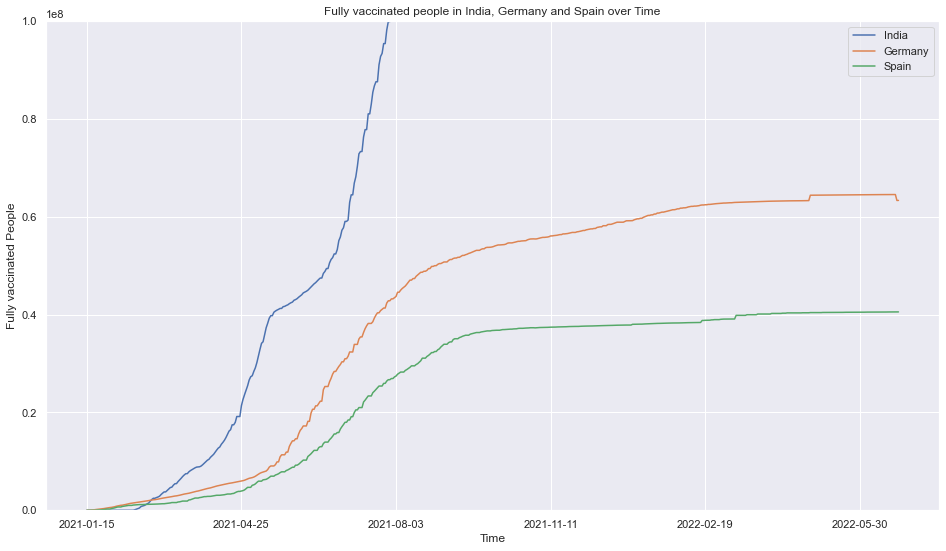

In [71]:
plt.figure();
ax=vacc_plot.iloc[:,:].set_index('Date').plot()
plt.ylim(0, 100000000)
# plt.xlim(0,100)
plt.ylabel('Fully vaccinated People')
plt.xlabel('Time')
plt.title("Fully vaccinated people in India, Germany and Spain over Time")
# ax.set_yscale('log')

## Vaccination per population plot over time

Text(0.5, 1.0, 'Fully vaccinated people per population in India, Germany and Spain over Time')

<Figure size 1152x648 with 0 Axes>

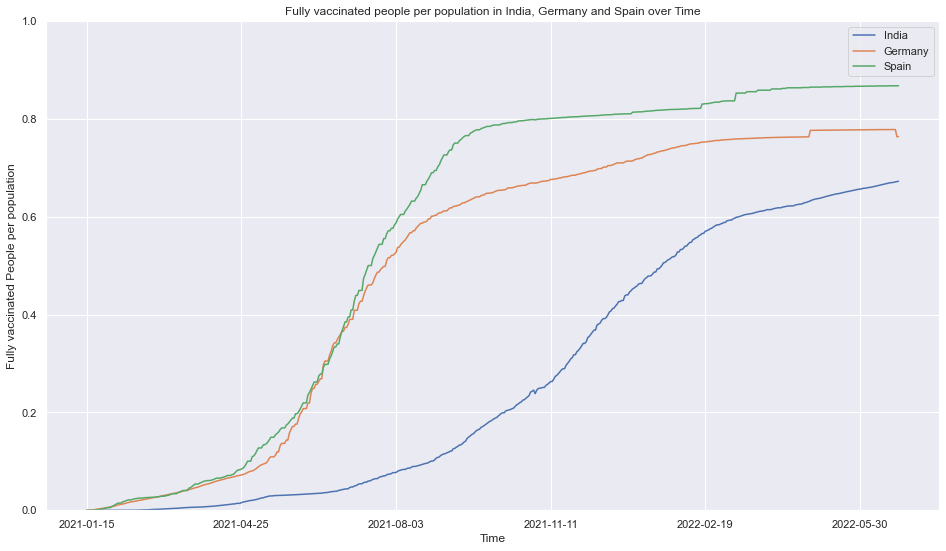

In [72]:
plt.figure();
ax=vac_per_pop.iloc[:,:].set_index('Date').plot()
plt.ylim(0, 1)
# plt.xlim(0,100)
plt.ylabel('Fully vaccinated People per population')
plt.xlabel('Time')
plt.title("Fully vaccinated people per population in India, Germany and Spain over Time")